# Exploring the other DataFrames that contain hypotetical features

The aim is to clean the other dataframes to be used for the feature selection

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
# We'll import the dataframe that results from the datafiles in "raw_df_for_features"
# and at the end we'll export one file with all of the hypothetical features

In [3]:
df = pd.read_csv('Data.csv')

#Reinstating the index 
df.loc[:,'date'] = pd.to_datetime(df.loc[:,'date'][:-1],format='%Y-%m ').dt.strftime('%Y-%m')
#df.loc[:,'date'] = df.loc[:,'date'].dt.strftime('%Y-%m')
df.set_index(['country','date'], inplace=True)

#Converting data into numeric types
for i in df.index:
    for j in df.columns:
        df.loc[i,j] = float(df.loc[i,j])

display(df)

df.info()

df.to_csv('CleanData.csv', index=True)

Electricity import (GWh)  Electricity export (GWh)  \
country date                                                          
AL      2007-01                       NaN                       NaN   
        2007-02                       NaN                       NaN   
        2007-03                       NaN                       NaN   
        2007-04                       NaN                       NaN   
        2007-05                       NaN                       NaN   
...                                   ...                       ...   
XK      2023-10                   243.327                    198.32   
        2023-11                       NaN                       NaN   
        2023-12                       NaN                       NaN   
        2024-01                       NaN                       NaN   
        NaN                           NaN                       NaN   

                 Electricity available (GWh)  \
country date                                   
AL      2007-01                          NaN   
        2007-02                          NaN   
        2007-03                          NaN   
        2007-04                          NaN   
        2007-05                          NaN   
...                                      ...   
XK      2023-10                      513.611   
        2023-11                          NaN   
        2023-12                          NaN   
        2024-01                          NaN   
        NaN                              NaN   

                 Electricity generated from natural gas GWh  \
country date                                                  
AL      2007-01                                         NaN   
        2007-02                                         NaN   
        2007-03                                         NaN   
        2007-04                                         NaN   
        2007-05                                         NaN   
...                                                     ...   
XK      2023-10                                         0.0   
        2023-11                                         NaN   
        2023-12                                         NaN   
        2024-01                                         NaN   
        NaN                                             NaN   

                 Total electricity generated GWh  \
country date                                       
AL      2007-01                              NaN   
        2007-02                              NaN   
        2007-03                              NaN   
        2007-04                              NaN   
        2007-05                              NaN   
...                                          ...   
XK      2023-10                          468.603   
        2023-11                              NaN   
        2023-12                              NaN   
        2024-01                              NaN   
        NaN                                  NaN   

                 Fraction of electricity generated by gas  \
country date                                                
AL      2007-01                                       NaN   
        2007-02                                       NaN   
        2007-03                                       NaN   
        2007-04                                       NaN   
        2007-05                                       NaN   
...                                                   ...   
XK      2023-10                                       0.0   
        2023-11                                       NaN   
        2023-12                                       NaN   
        2024-01                                       NaN   
        NaN                                           NaN   

                 Gas from other sources Mm3  Gas exported Mm3  \
country date                                                    
AL      2007-01                         NaN    

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 8834 entries, ('AL', '2007-01') to ('XK', nan)
Data columns (total 16 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Electricity import (GWh)                        7081 non-null   float64
 1   Electricity export (GWh)                        7081 non-null   float64
 2   Electricity available (GWh)                     7082 non-null   float64
 3   Electricity generated from natural gas GWh      3075 non-null   float64
 4   Total electricity generated GWh                 3101 non-null   float64
 5   Fraction of electricity generated by gas        3006 non-null   float64
 6   Gas from other sources Mm3                      1488 non-null   float64
 7   Gas exported Mm3                                3916 non-null   float64
 8   Gas consumed Mm3                                4077 non-null   float64
 9   Gas imported Mm3  

## Let's delete some dates/timestamps

In [3]:
df = pd.read_csv('CleanData.csv')
#Reinstating the index 
df.loc[:,'date'] = pd.to_datetime(df.loc[:,'date'][:-1],format='%Y-%m')
df.set_index(['country','date'], inplace=True)

#rows with little non-NaN values
df = df.dropna(thresh=round(len(df.columns)/3))

#rows after february 2020 (start of covid spreading in europe)
#df = df.loc[(slice(None), slice(None, pd.to_datetime("2020-02",format='%Y-%m'))), :]


df.info()
display(df)

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 6769 entries, ('AL', Timestamp('2018-01-01 00:00:00')) to ('XK', Timestamp('2023-10-01 00:00:00'))
Data columns (total 16 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Electricity import (GWh)                        6614 non-null   float64
 1   Electricity export (GWh)                        6614 non-null   float64
 2   Electricity available (GWh)                     6615 non-null   float64
 3   Electricity generated from natural gas GWh      3075 non-null   float64
 4   Total electricity generated GWh                 3101 non-null   float64
 5   Fraction of electricity generated by gas        3006 non-null   float64
 6   Gas from other sources Mm3                      1486 non-null   float64
 7   Gas exported Mm3                                3912 non-null   float64
 8   Gas consumed Mm3                           

Electricity import (GWh)  Electricity export (GWh)  \
country date                                                             
AL      2018-01-01                    97.366                   244.825   
        2018-02-01                    10.377                   379.292   
        2018-03-01                     6.913                   580.513   
        2018-04-01                     6.436                   593.729   
        2018-05-01                    11.847                   432.244   
...                                      ...                       ...   
XK      2023-06-01                   201.925                   196.891   
        2023-07-01                   268.050                   226.059   
        2023-08-01                   293.908                   202.609   
        2023-09-01                   246.256                   202.573   
        2023-10-01                   243.327                   198.320   

                    Electricity available (GWh)  \
country date                                      
AL      2018-01-01                      588.340   
        2018-02-01                      542.046   
        2018-03-01                      564.343   
        2018-04-01                      465.565   
        2018-05-01                      476.886   
...                                         ...   
XK      2023-06-01                      454.795   
        2023-07-01                      520.260   
        2023-08-01                      514.419   
        2023-09-01                      459.781   
        2023-10-01                      513.611   

                    Electricity generated from natural gas GWh  \
country date                                                     
AL      2018-01-01                                         0.0   
        2018-02-01                                         0.0   
        2018-03-01                                         0.0   
        2018-04-01                                         0.0   
        2018-05-01                                         0.0   
...                                                        ...   
XK      2023-06-01                                         0.0   
        2023-07-01                                         0.0   
        2023-08-01                                         0.0   
        2023-09-01                                         0.0   
        2023-10-01                                         0.0   

                    Total electricity generated GWh  \
country date                                          
AL      2018-01-01                          884.286   
        2018-02-01                         1054.965   
        2018-03-01                         1291.465   
        2018-04-01                         1174.183   
        2018-05-01                         1007.731   
...                                             ...   
XK      2023-06-01                          449.761   
        2023-07-01                          478.270   
        2023-08-01                          423.120   
        2023-09-01                          416.098   
        2023-10-01                          468.603   

                    Fraction of electricity generated by gas  \
country date                                                   
AL      2018-01-01                                       0.0   
        2018-02-01                                       0.0   
        2018-03-01                                       0.0   
        2018-04-01                                       0.0   
        2018-05-01                                       0.0   
...                                                      ...   
XK      2023-06-01                                       0.0   
        2023-07-01                                       0.0   
        2023-08-01                                       0.0   
        2023-09-01                                       0.0   
        2023-10-01                                

Let's now delete some columns

In [4]:
#dropping columns with few entries
df = df.drop('Gas from other sources Mm3',axis=1)

#let's investigate the 4 columns of electricity and gas prices for industry and households



#S

In [5]:
normalized_df = (df - df.min()) / (df.max() - df.min())
display(normalized_df)
normalized_df.loc[:,'Electricity available (GWh)'].max()

Electricity import (GWh)  Electricity export (GWh)  \
country date                                                             
AL      2018-01-01                  0.011762                  0.027248   
        2018-02-01                  0.001609                  0.042073   
        2018-03-01                  0.001205                  0.064258   
        2018-04-01                  0.001149                  0.065715   
        2018-05-01                  0.001781                  0.047911   
...                                      ...                       ...   
XK      2023-06-01                  0.023965                  0.021963   
        2023-07-01                  0.031683                  0.025179   
        2023-08-01                  0.034701                  0.022594   
        2023-09-01                  0.029139                  0.022590   
        2023-10-01                  0.028797                  0.022121   

                    Electricity available (GWh)  \
country date                                      
AL      2018-01-01                     0.010287   
        2018-02-01                     0.009481   
        2018-03-01                     0.009869   
        2018-04-01                     0.008150   
        2018-05-01                     0.008347   
...                                         ...   
XK      2023-06-01                     0.007963   
        2023-07-01                     0.009102   
        2023-08-01                     0.009000   
        2023-09-01                     0.008049   
        2023-10-01                     0.008986   

                    Electricity generated from natural gas GWh  \
country date                                                     
AL      2018-01-01                                         0.0   
        2018-02-01                                         0.0   
        2018-03-01                                         0.0   
        2018-04-01                                         0.0   
        2018-05-01                                         0.0   
...                                                        ...   
XK      2023-06-01                                         0.0   
        2023-07-01                                         0.0   
        2023-08-01                                         0.0   
        2023-09-01                                         0.0   
        2023-10-01                                         0.0   

                    Total electricity generated GWh  \
country date                                          
AL      2018-01-01                         0.015264   
        2018-02-01                         0.018241   
        2018-03-01                         0.022366   
        2018-04-01                         0.020320   
        2018-05-01                         0.017417   
...                                             ...   
XK      2023-06-01                         0.007684   
        2023-07-01                         0.008181   
        2023-08-01                         0.007219   
        2023-09-01                         0.007097   
        2023-10-01                         0.008013   

                    Fraction of electricity generated by gas  \
country date                                                   
AL      2018-01-01                                       0.0   
        2018-02-01                                       0.0   
        2018-03-01                                       0.0   
        2018-04-01                                       0.0   
        2018-05-01                                       0.0   
...                                                      ...   
XK      2023-06-01                                       0.0   
        2023-07-01                                       0.0   
        2023-08-01                                       0.0   
        2023-09-01                                       0.0   
        2023-10-01                                

1.0

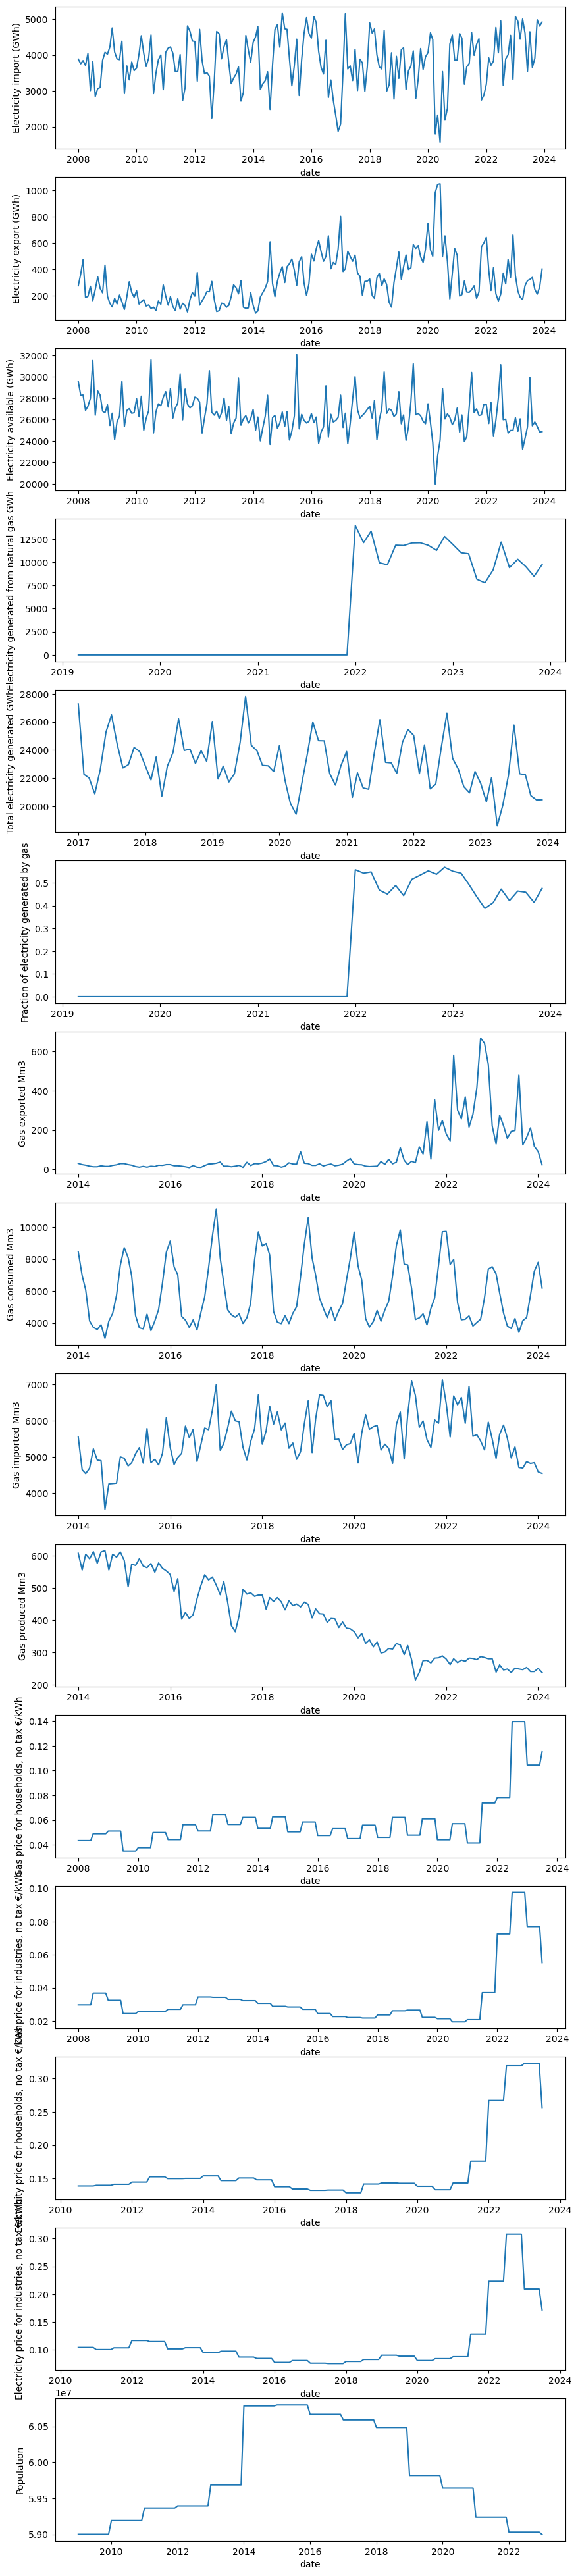

In [6]:
#Creating a datafile for Portugal only
dfPT = df.loc['IT']
df_melted = dfPT.melt(id_vars=['Electricity import (GWh)'], value_vars=['Electricity available (GWh)'])

'''
#Plot everything normalized
normalized_df = (dfPT - dfPT.min()) / (dfPT.max() - dfPT.min())
df_melted = normalized_df.melt(id_vars=['Electricity import (GWh)'], value_vars=df.columns)
sb.lineplot(data=df_melted)
'''

# Plotting everything

fig, axes = plt.subplots(len(df.columns),1,figsize = (10,50))

for i in range(0,len(dfPT.columns)):
    sb.lineplot(data = dfPT[dfPT.columns[i]], ax=axes[i]) 



It is evident that in the case of Portugal, the gas production is not a useful parameter. Let's investigate if the data available only from 2014 (Gas flow) or 2017 (Electricity production) on are influential to regress gas imports. Let's start by plotting the gas data against gas consumption.

In [7]:
dfPT = dfPT.drop(['Gas produced Mm3'],axis=1)

,Electricity import (GWh),Electricity export (GWh),Electricity available (GWh),Electricity generated from natural gas GWh,Total electricity generated GWh,Fraction of electricity generated by gas,Gas exported Mm3,Gas consumed Mm3,Gas imported Mm3,"Gas price for households, no tax €/kWh","Gas price for industries, no tax €/kWh","Electricity price for households, no tax €/kWh","Electricity price for industries, no tax €/kWh",Population
Electricity import (GWh),1.000000,-0.230550,0.146074,NaN,-0.298506,NaN,-0.007531,0.209690,-0.223312,-0.054044,0.026981,0.071217,-0.012584,0.016084
Electricity export (GWh),-0.230550,1.000000,-0.134634,NaN,0.303398,NaN,-0.104204,0.079196,0.253332,0.006910,-0.501807,-0.337833,-0.622004,0.506450
Electricity available (GWh),0.146074,-0.134634,1.000000,NaN,0.903659,NaN,0.072787,0.116553,0.371260,-0.018142,0.079108,-0.070521,0.166139,-0.221168
Electricity generated from natural gas GWh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total electricity generated GWh,-0.298506,0.303398,0.903659,NaN,1.000000,NaN,-0.016011,0.052448,0.375072,0.294415,-0.039813,0.161156,0.020643,0.015112
Fraction of electricity generated by gas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gas exported Mm3,-0.007531,-0.104204,0.072787,NaN,-0.016011,NaN,1.000000,0.507431,0.123890,0.164707,-0.139997,-0.118653,-0.041426,-0.248939
Gas consumed Mm3,0.209690,0.079196,0.116553,NaN,0.052448,NaN,0.507431,1.000000,0.297175,-0.255393,-0.163438,-0.154572,-0.153677,-0.187681
Gas imported Mm3,-0.223312,0.253332,0.371260,NaN,0.375072,NaN,0.123890,0.297175,1.000000,-0.358387,-0.465731,-0.472215,-0.409366,-0.401500
"Gas price for households, no tax €/kWh",-0.054044,0.006910,-0.018142,NaN,0.294415,NaN,0.164707,-0.255393,-0.358387,1.000000,0.269289,0.535958,0.311363,0.287221


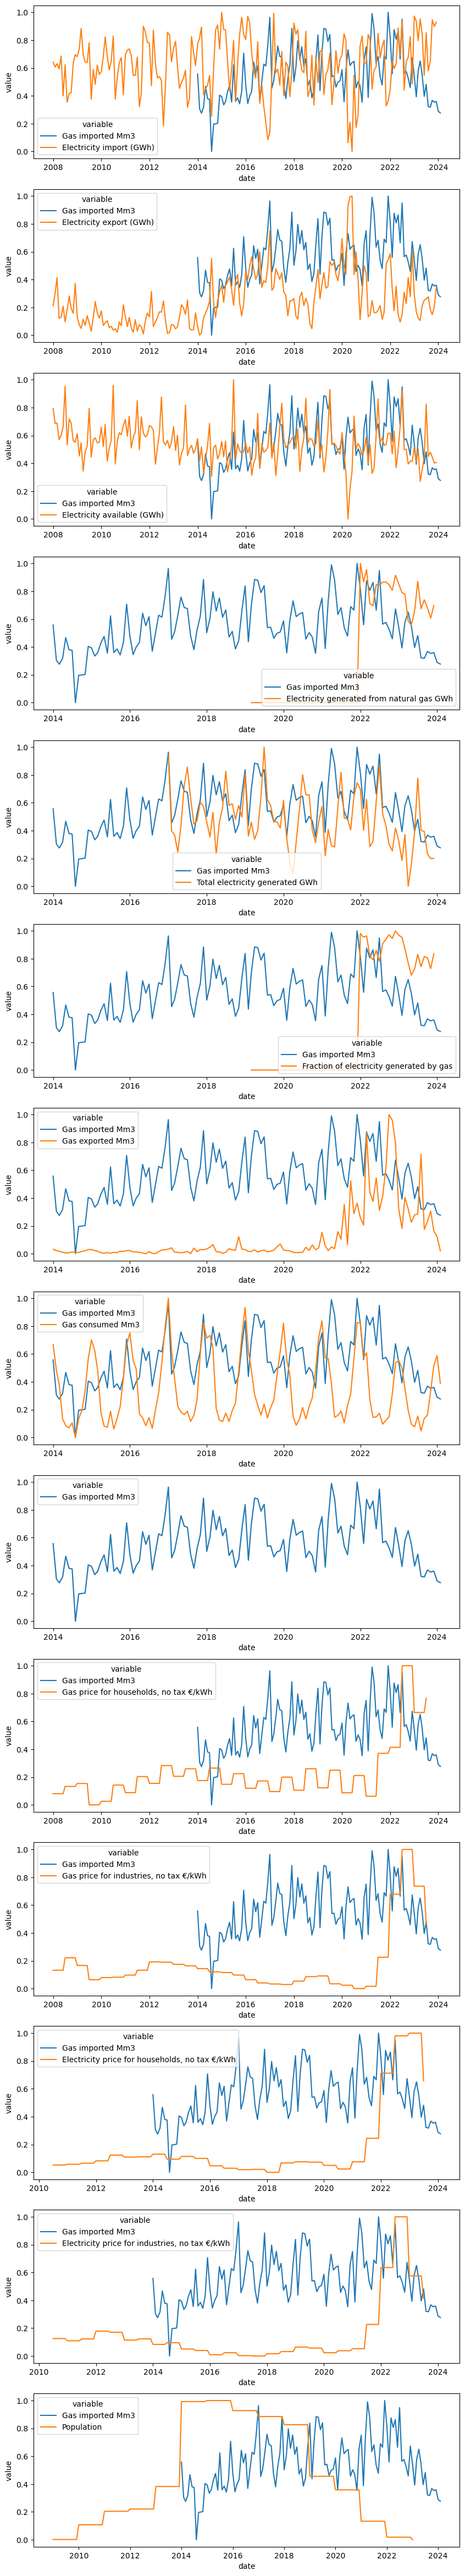

In [8]:
#Plotting normalized data
dfPTn = dfPT.copy(deep=True)

for column in dfPTn.columns: #what I do here is put all values on a scale from 0 to 1, where 0 corresponds to min value and 1 to max value
    dfPTn.loc[:,column] = (dfPTn.loc[:,column] - dfPTn.loc[:,column].min())/(dfPTn.loc[:,column].max() - dfPTn.loc[:,column].min())

dfPTn = dfPTn.reset_index()

fig, axes = plt.subplots(len(dfPTn.columns)-1,1,figsize = (10,60))

j = 1
for i in range(0,len(dfPTn.columns)-1):
    sb.lineplot(x='date', y='value', hue='variable',data = pd.melt(dfPTn[['date','Gas imported Mm3',dfPTn.columns[j]]], ['date']), ax=axes[i])
    j = j + 1

dfPTn = dfPTn.set_index('date')

#let's see for only the non-NaN values
display(dfPTn.loc[slice(None, pd.to_datetime("2020-02",format='%Y-%m')), :].corr())

Looks like the electricity generated by gas (and as such the fraction of electricity generated by gas) is a good indicator of how much gas Portugal imports, as well as gas consumed. Electricity exports on the other hand seem to be inversely correlated to the metric of our interest. From the correlation matrix, however, none of these values shows a strong correlation (0.8 or more). This latter matrix shows a connection between the gas prices for housings and industry and the industry's prices for electricity and gas, while the electricity price for housing and industry are not well linked, as well as the household prices for gas and electricity (a high electricity price does not correlate strongly to a high price of gas).

From the correlation matrix we also notice that when gas is imported, prices for gas and electricity tend to decrease.

We will discard: the information about Population, Gas and electricity prices.

In [9]:
dfPT = dfPT.drop(['Population','Gas price for households, no tax €/kWh','Gas price for industries, no tax €/kWh','Electricity price for households, no tax €/kWh','Electricity price for industries, no tax €/kWh'],axis=1)

### Feature engineering and selection

,Electricity import (GWh),Electricity export (GWh),Electricity available (GWh),Electricity generated from natural gas GWh,Total electricity generated GWh,Fraction of electricity generated by gas,Gas exported Mm3,Gas consumed Mm3,Gas imported Mm3,Month,sinMonth,Gas imported last month Mm3
Electricity import (GWh),1.000000,-0.230550,0.146074,NaN,-0.298506,NaN,-0.007531,0.209690,-0.223312,-0.245553,-0.415202,-0.246257
Electricity export (GWh),-0.230550,1.000000,-0.134634,NaN,0.303398,NaN,-0.104204,0.079196,0.253332,-0.067350,-0.033651,0.271182
Electricity available (GWh),0.146074,-0.134634,1.000000,NaN,0.903659,NaN,0.072787,0.116553,0.371260,-0.021350,0.193390,0.182337
Electricity generated from natural gas GWh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total electricity generated GWh,-0.298506,0.303398,0.903659,NaN,1.000000,NaN,-0.016011,0.052448,0.375072,0.095113,0.415503,0.165321
Fraction of electricity generated by gas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gas exported Mm3,-0.007531,-0.104204,0.072787,NaN,-0.016011,NaN,1.000000,0.507431,0.123890,0.129736,-0.293072,0.068382
Gas consumed Mm3,0.209690,0.079196,0.116553,NaN,0.052448,NaN,0.507431,1.000000,0.297175,-0.242535,-0.765562,0.136979
Gas imported Mm3,-0.223312,0.253332,0.371260,NaN,0.375072,NaN,0.123890,0.297175,1.000000,-0.068795,-0.125689,0.581201
Month,-0.245553,-0.067350,-0.021350,NaN,0.095113,NaN,0.129736,-0.242535,-0.068795,1.000000,0.570496,-0.283830


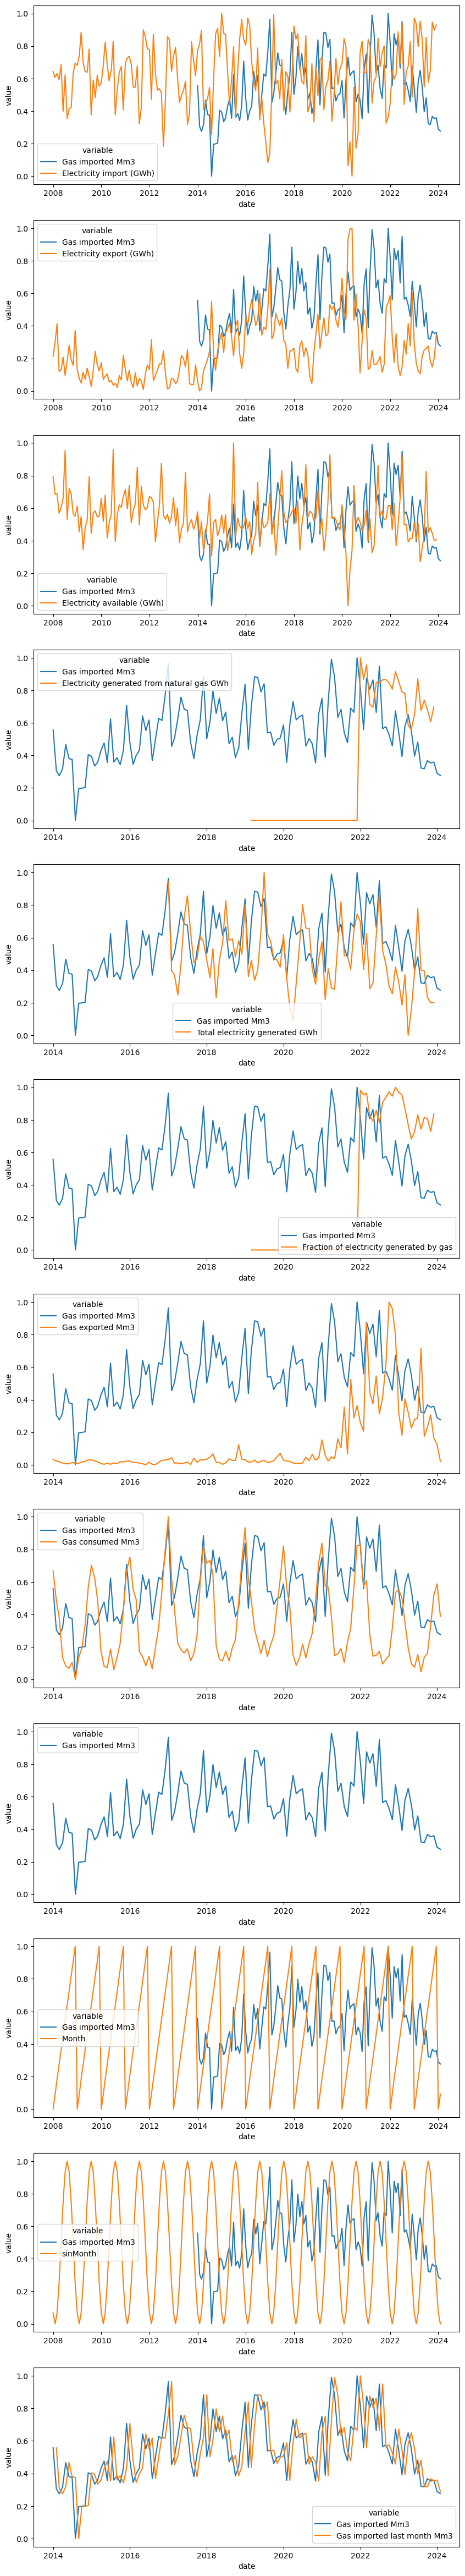

In [10]:
dfPT['Month'] = dfPT.index.month

dfPT['sinMonth'] = 1 + np.sin((dfPT['Month']-5)/6*np.pi) #January is numerically close to December

dfPT['Gas imported last month Mm3'] = dfPT['Gas imported Mm3'].shift(1) # Gas imported the last month


#Plotting normalized data
dfPTn = dfPT.copy(deep=True)

for column in dfPTn.columns: #what I do here is put all values on a scale from 0 to 1, where 0 corresponds to min value and 1 to max value
    dfPTn.loc[:,column] = (dfPTn.loc[:,column] - dfPTn.loc[:,column].min())/(dfPTn.loc[:,column].max() - dfPTn.loc[:,column].min())

dfPTn = dfPTn.reset_index()

fig, axes = plt.subplots(len(dfPTn.columns)-1,1,figsize = (10,60))

j = 1
for i in range(0,len(dfPTn.columns)-1):
    sb.lineplot(x='date', y='value', hue='variable',data = pd.melt(dfPTn[['date','Gas imported Mm3',dfPTn.columns[j]]], ['date']), ax=axes[i])
    j = j + 1

dfPTn = dfPTn.set_index('date')

#let's see for only the non-NaN values
display(dfPTn.loc[slice(None, pd.to_datetime("2020-02",format='%Y-%m')), :].corr())

In [13]:
df.loc[(slice(None),slice(None)),'Fraction of electricity generated by gas'] > 0.4
#df[df.eq('0.974316815731312').any(1)]
#df = df.loc[:,df.columns.str.contains('GWh')]
display(df.loc[df.loc[df['Fraction of electricity generated by gas'] > 0.6].index[:]])



Electricity import (GWh)  Electricity export (GWh)  \
country date                                                             
GE      2022-12-01                   734.024                   516.481   
        2023-01-01                   767.353                   520.397   
        2023-02-01                   577.584                   371.470   
IE      2017-07-01                    82.433                   209.796   
        2017-08-01                    89.261                   172.844   
...                                      ...                       ...   
NL      2019-10-01                  1253.591                  1678.992   
        2020-01-01                  1746.274                  2002.073   
        2020-06-01                  1352.964                  1385.947   
        2020-07-01                  1153.764                  2421.540   
        2020-08-01                  1108.409                  2285.573   

                    Electricity available (GWh)  \
country date                                      
GE      2022-12-01                     1260.925   
        2023-01-01                     1291.187   
        2023-02-01                     1128.048   
IE      2017-07-01                     2200.177   
        2017-08-01                     2202.882   
...                                         ...   
NL      2019-10-01                     9737.325   
        2020-01-01                    10544.755   
        2020-06-01                     8645.398   
        2020-07-01                     8961.156   
        2020-08-01                     9341.871   

                    Electricity generated from natural gas GWh  \
country date                                                     
GE      2022-12-01                                     662.019   
        2023-01-01                                     697.429   
        2023-02-01                                     615.655   
IE      2017-07-01                                    1477.708   
        2017-08-01                                    1421.376   
...                                                        ...   
NL      2019-10-01                                    6529.843   
        2020-01-01                                    7505.189   
        2020-06-01                                    5683.439   
        2020-07-01                                    6723.126   
        2020-08-01                                    6923.333   

                    Total electricity generated GWh  \
country date                                          
GE      2022-12-01                         1080.885   
        2023-01-01                         1073.116   
        2023-02-01                          954.155   
IE      2017-07-01                         2351.682   
        2017-08-01                         2286.680   
...                                             ...   
NL      2019-10-01                        10560.070   
        2020-01-01                        11242.878   
        2020-06-01                         9019.921   
        2020-07-01                        10576.191   
        2020-08-01                        10842.105   

                    Fraction of electricity generated by gas  \
country date                                                   
GE      2022-12-01                                  0.612479   
        2023-01-01                                  0.649910   
        2023-02-01                                  0.645236   
IE      2017-07-01                                  0.628362   
        2017-08-01                                  0.621589   
...                                                      ...   
NL      2019-10-01                                  0.618352   
        2020-01-01                                  0.667551   
        2020-06-01                                  0.630099   
        2020-07-01                                  0.635685   
        2020-08-01                                